### NOMBRE PROYECTO: Describir el Nombre del Proyecto

### FECHA: 

## CONTEXTO




### DESCRIPCIÓN DE LA DATA

* **Mora Morosidad del cliente:** {0: paga al día, 1: cliente moroso}
* **Atraso** Atraso histórico del cliente en días.
* **Vivienda** Tipo de vivienda del cliente.
* **Edad** Edad del cliente.
* **Días_lab** Días laborados en su actual empleo.
* **Exp_sf** Meses con experiencia en el sistema financiero, es decir el número de meses que tiene el cliente desde que adquirió algún producto financiero.
* **Nivel_ahorro** Índice del nivel de ahorro del cliente: {0: no tiene ahorros, 12: alto nivel de ahorros}
* **Ingreso**	Ingresos del cliente.
* **Línea_sf** Línea de crédito en el sistema financiero que el cliente tiene disponible.
* **Deuda_sf** Deuda del cliente en el sistema financiero.
* **Score** Calificación crediticia del cliente. Mientras mayor es el score, mejor perfil crediticio tiene el cliente.
* **Zona** Departamento de residencia del cliente.
* **Clasif_sbs** Clasificación SBS. Mientras mayor es el número, peor clasificación tiene el cliente: {0: normal, 1: con problemas potenciales, 2: deficiente, 3: dudoso, * 4: pérdida}
* **Nivel_educ**	Nivel educativo máximo alcanzado por el cliente.



## METODOLOGÍA UTILIZADA EN EL PROYECTO DE CIENCIA DE DATOS
## NOMBRE: CRISP-DM
* FASE 1: Comprensión del Negocio: objetivos especificos de la fase
* FASE 2: Comprensión de los datos: objetivos especificos de la fase
* FASE 3: Preparación de los datos: objetivos especificos de la fase
* FASE 4: Modelado: objetivos especificos de la fase
* FASE 5: Evaluación del modelo: objetivos especificos de la fase
* FASE 6: Despliegue: objetivos especificos de la fase

# FASE 1: Comprensión del Negocio

In [11]:
# Carga de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [12]:
#Carga Dataset
df = pd.read_csv('data.csv', sep=",")

# FASE 2: Comprensión de los datos

In [3]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0               

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
info = df.shape
print("\nLa cantidad de filas y columnas en nuestro dataframe es de:",info)


La cantidad de filas y columnas en nuestro dataframe es de: (309, 16)


In [7]:
tipos = df.dtypes
print("\nTipos de datos presentes en el dataset:\n",tipos)


Tipos de datos presentes en el dataset:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Análisis Univariado

### Análisis Univariado: **Age**

Análisis Univariado de la Variable 'Age'
Media: 62.67
Mediana: 62.00
Desviación Estándar: 8.20
Valor Mínimo: 21.00
Valor Máximo: 87.00


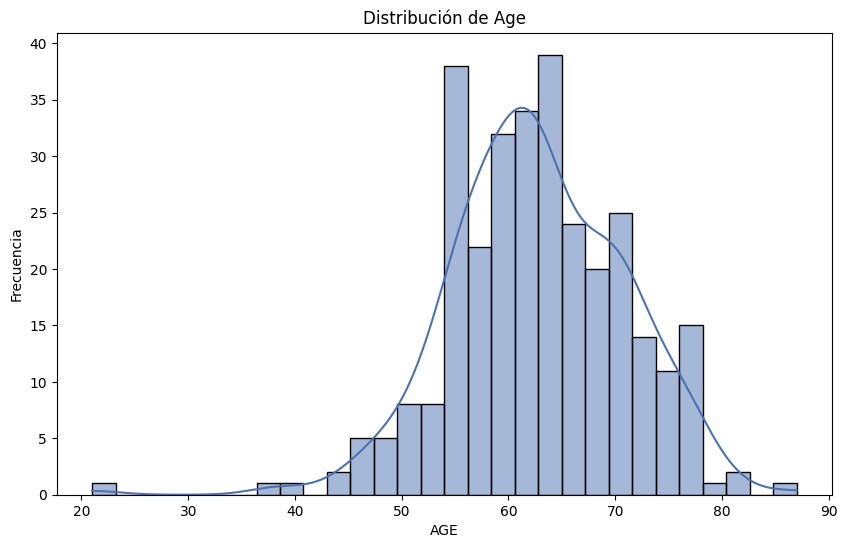

In [14]:
# Descripción estadística básica de la variable 'Age'
AGE_mean = np.mean(df['AGE'])
AGE_median = np.median(df['AGE'])
AGE_std = np.std(df['AGE'])
AGE_min = np.min(df['AGE'])
AGE_max = np.max(df['AGE'])

print("Análisis Univariado de la Variable 'Age'")
print(f"Media: {AGE_mean:.2f}")
print(f"Mediana: {AGE_median:.2f}")
print(f"Desviación Estándar: {AGE_std:.2f}")
print(f"Valor Mínimo: {AGE_min:.2f}")
print(f"Valor Máximo: {AGE_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de Age')
plt.xlabel('AGE')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Univariado: **Edad**

Análisis Univariado de la Variable 'edad'
Media: 36.40
Mediana: 34.00
Desviación Estándar: 9.83
Valor Mínimo: 20.00
Valor Máximo: 85.00


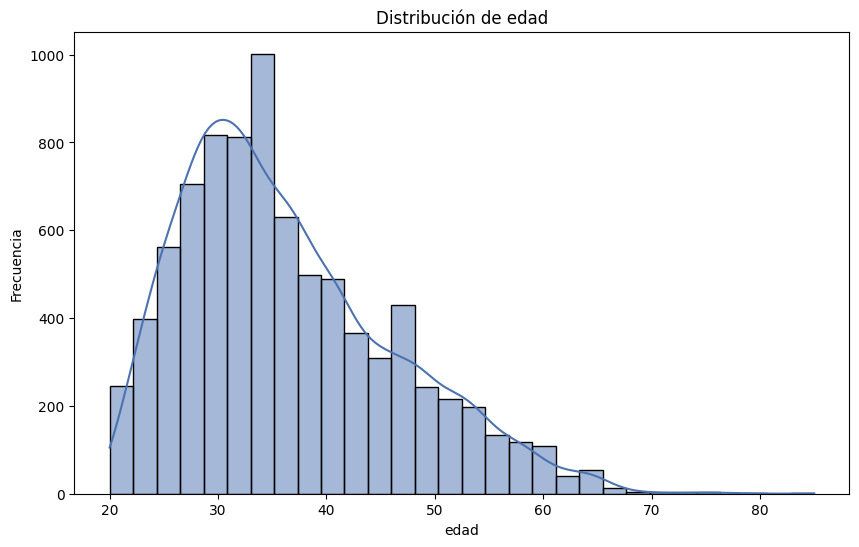

In [157]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['edad'])
profundity_median = np.median(df['edad'])
profundity_std = np.std(df['edad'])
profundity_min = np.min(df['edad'])
profundity_max = np.max(df['edad'])

print("Análisis Univariado de la Variable 'edad'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de edad')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Univariado: **Días laborales**

Análisis Univariado de la Variable 'Dias_lab'
Media: 5555.89
Mediana: 4904.00
Desviación Estándar: 2153.12
Valor Mínimo: 2956.00
Valor Máximo: 20700.00


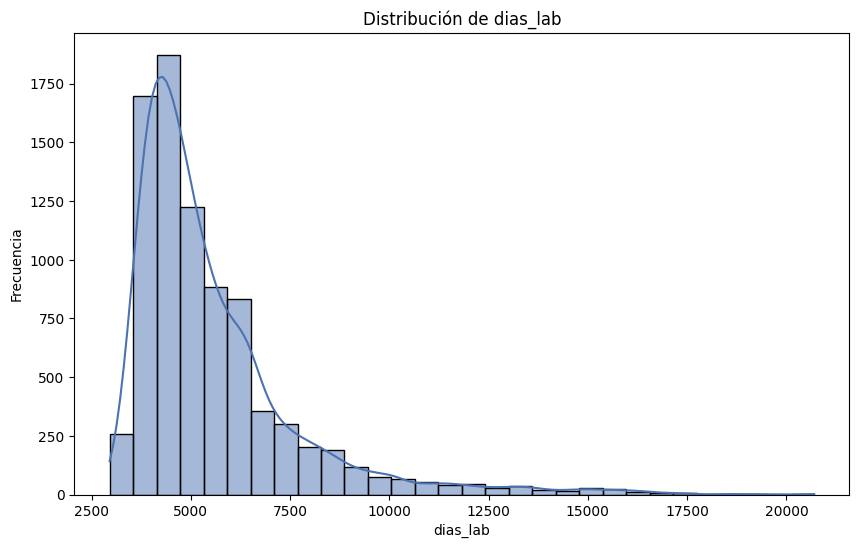

In [158]:
# Descripción estadística básica de la variable 'dias_lab'
dias_lab_mean = np.mean(df['dias_lab'])
dias_lab_median = np.median(df['dias_lab'])
dias_lab_std = np.std(df['dias_lab'])
dias_lab_min = np.min(df['dias_lab'])
dias_lab_max = np.max(df['dias_lab'])

print("Análisis Univariado de la Variable 'Dias_lab'")
print(f"Media: {dias_lab_mean:.2f}")
print(f"Mediana: {dias_lab_median:.2f}")
print(f"Desviación Estándar: {dias_lab_std:.2f}")
print(f"Valor Mínimo: {dias_lab_min:.2f}")
print(f"Valor Máximo: {dias_lab_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['dias_lab'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de dias_lab')
plt.xlabel('dias_lab')
plt.ylabel('Frecuencia')
plt.show()

### Análisis Univariado: **Zona**

Análisis Univariado de la Variable 'Zona' (Top 20)
Frecuencia de las 10 categorías más frecuentes:
zona
Lima           4980
Callao          507
La Libertad     447
Arequipa        349
Ica             300
Piura           279
Lambayeque      279
Junin           263
Ancash          224
Cajamarca       173
Loreto          118
Cuzco            96
Ucayali          85
Pasco            53
Moquegua         46
San Martin       45
Huanuco          37
Tacna            32
Puno             23
Ayacucho         23
Name: count, dtype: int64
Moda (Categoría más frecuente): Lima


C:\Users\lea\AppData\Local\Temp\ipykernel_21480\563051029.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='zona', data=df[df['zona'].isin(zona_top10_frecuencia.index)], order=zona_top10_frecuencia.index, palette='Set2')


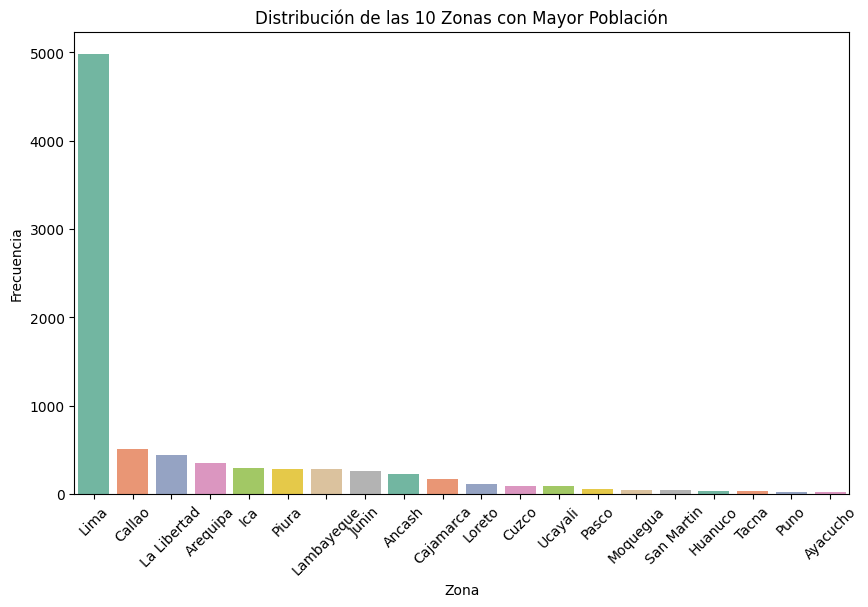

In [159]:
# Descripción estadística básica de la variable 'zona' (top 10)
zona_top10_frecuencia = df['zona'].value_counts().head(20)
zona_moda_top10 = zona_top10_frecuencia.idxmax()

print("Análisis Univariado de la Variable 'Zona' (Top 20)")
print(f"Frecuencia de las 10 categorías más frecuentes:\n{zona_top10_frecuencia}")
print(f"Moda (Categoría más frecuente): {zona_moda_top10}")

# Gráfico de barras para las 10 zonas con mayor población
plt.figure(figsize=(10, 6))
sns.countplot(x='zona', data=df[df['zona'].isin(zona_top10_frecuencia.index)], order=zona_top10_frecuencia.index, palette='Set2')
plt.title('Distribución de las 10 Zonas con Mayor Población')
plt.xlabel('Zona')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


### Análisis Univariado: **Nivel educación**

Análisis Univariado de la Variable 'nivel_educ'
Frecuencia de cada categoría:
nivel_educ
UNIVERSITARIA    4802
TECNICA          3288
SECUNDARIA        267
SIN EDUCACION      42
Name: count, dtype: int64
Moda (Categoría más frecuente): UNIVERSITARIA


C:\Users\lea\AppData\Local\Temp\ipykernel_21480\2155837078.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_educ', data=df, palette='Set2')


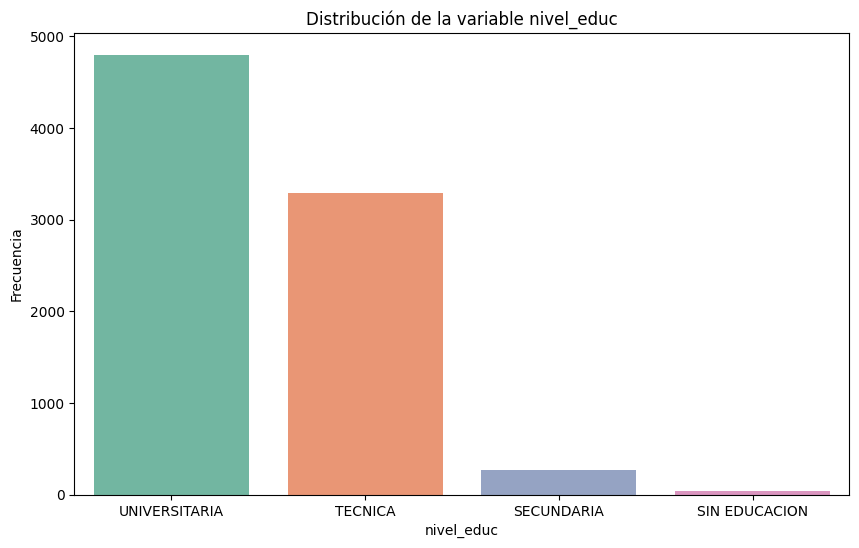

In [160]:
# Descripción estadística básica de la variable 'nivel_educ's
zona_frecuencia = df['nivel_educ'].value_counts()
zona_moda = df['nivel_educ'].mode()[0]

print("Análisis Univariado de la Variable 'nivel_educ'")
print(f"Frecuencia de cada categoría:\n{zona_frecuencia}")
print(f"Moda (Categoría más frecuente): {zona_moda}")

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_educ', data=df, palette='Set2')
plt.title('Distribución de la variable nivel_educ')
plt.xlabel('nivel_educ')
plt.ylabel('Frecuencia')
plt.show()

## Análisis Bivariado

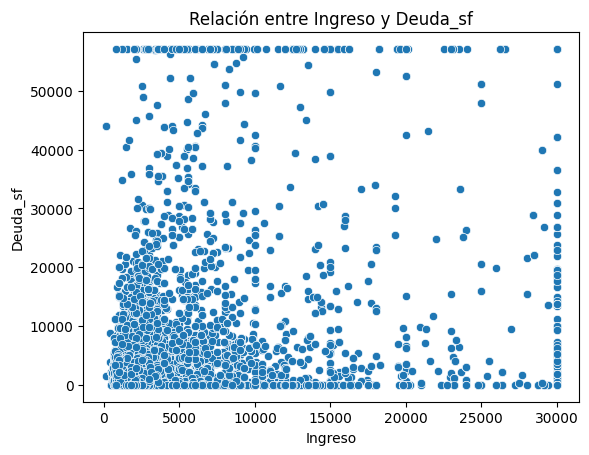

In [161]:
sns.scatterplot(x='ingreso', y='deuda_sf', data=df)
plt.title('Relación entre Ingreso y Deuda_sf')
plt.xlabel('Ingreso')
plt.ylabel('Deuda_sf')
plt.show()


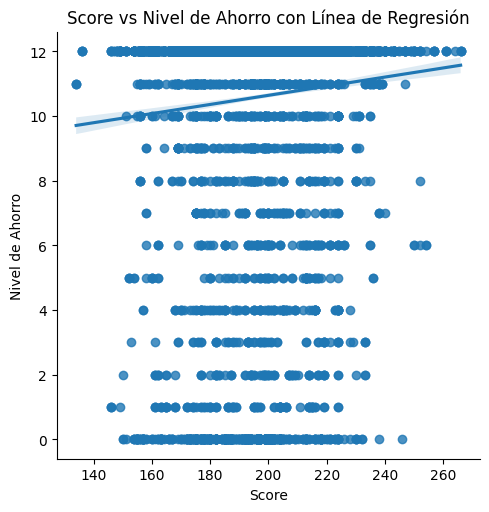

In [162]:
sns.lmplot(x='score', y='nivel_ahorro', data=df)
plt.title('Score vs Nivel de Ahorro con Línea de Regresión')
plt.xlabel('Score')
plt.ylabel('Nivel de Ahorro')
plt.show()


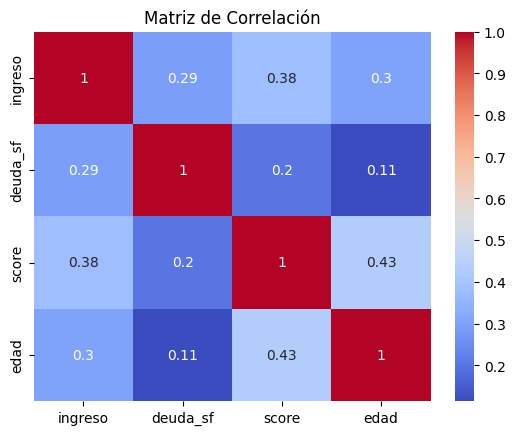

In [163]:
corr = df[['ingreso', 'deuda_sf', 'score', 'edad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


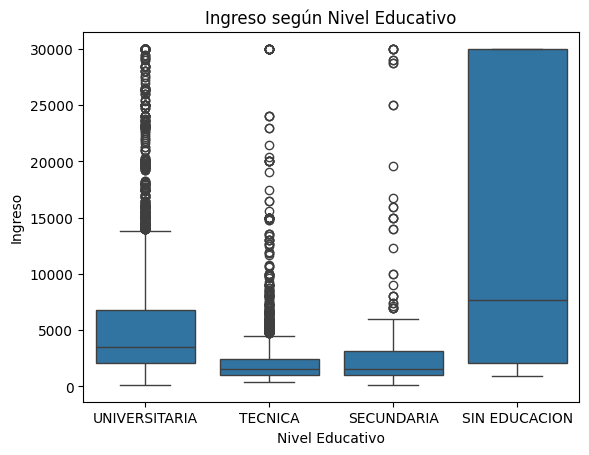

In [164]:
sns.boxplot(x='nivel_educ', y='ingreso', data=df)
plt.title('Ingreso según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso')
plt.show()


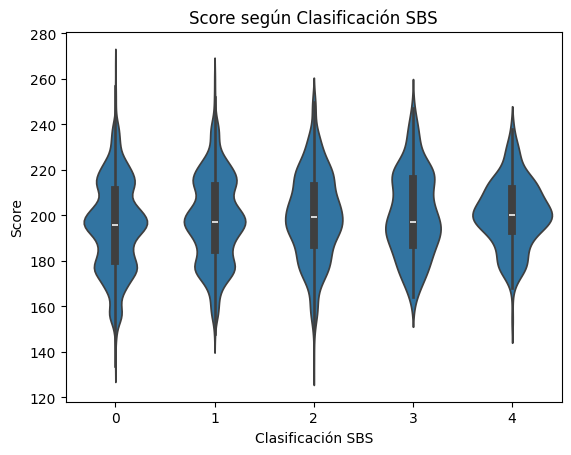

In [165]:
sns.violinplot(x='clasif_sbs', y='score', data=df)
plt.title('Score según Clasificación SBS')
plt.xlabel('Clasificación SBS')
plt.ylabel('Score')
plt.show()


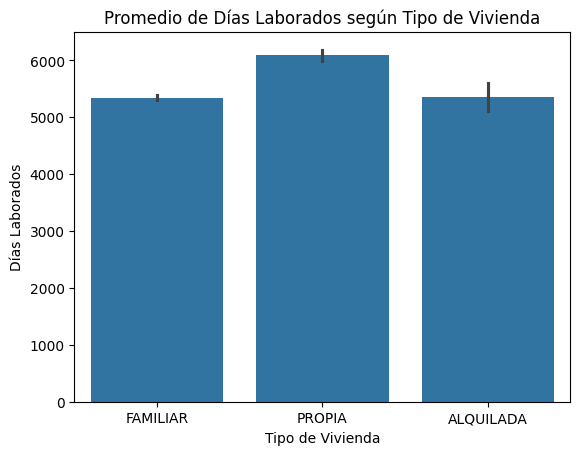

In [166]:
sns.barplot(x='vivienda', y='dias_lab', data=df)
plt.title('Promedio de Días Laborados según Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Días Laborados')
plt.show()


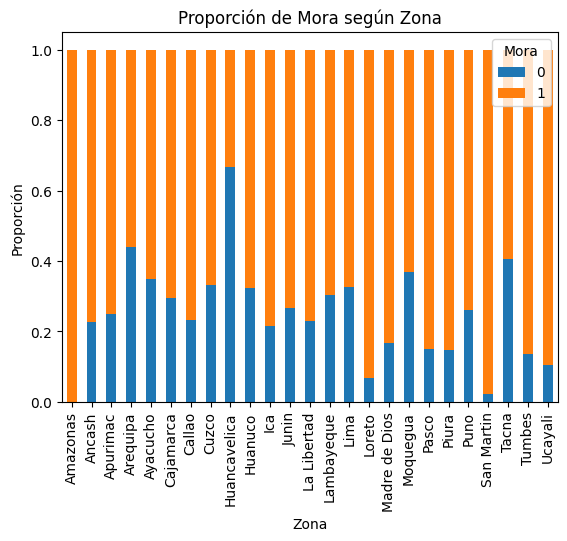

In [167]:
tabla_contingencia = pd.crosstab(df['zona'], df['mora'], normalize='index')
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Proporción de Mora según Zona')
plt.xlabel('Zona')
plt.ylabel('Proporción')
plt.legend(title='Mora', loc='upper right')
plt.show()


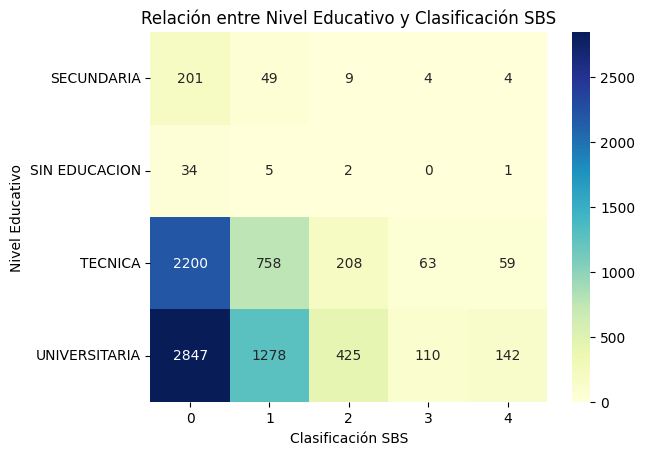

In [168]:
tabla_contingencia = pd.crosstab(df['nivel_educ'], df['clasif_sbs'])
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Nivel Educativo y Clasificación SBS')
plt.xlabel('Clasificación SBS')
plt.ylabel('Nivel Educativo')
plt.show()


## Análisis de Tendencias

## Resumen de Hallazgos Clave

# FASE 3: Preparación de los datos

### Durante dla preparacion de los datos vamos arealizar transformacione sobvre los valores neulos y dtambien  las variables categoricas las cuales vamos a aplicar metodos de transformacion como One-Hot Encoding o Label Encoding

### Tratamiento de variables Cualitativas

In [184]:
# Aplicar One-Hot Encoding en la columna 'vivienda'
df = pd.get_dummies(df, columns=['vivienda'], prefix='vivienda')

# Ver el resultado
df.head()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ,vivienda_ALQUILADA,vivienda_FAMILIAR,vivienda_PROPIA
0,0,235,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA,False,True,False
1,0,18,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA,False,True,False
2,0,0,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA,False,True,False
3,0,0,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA,False,True,False
4,0,0,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA,False,True,False


In [185]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
le = LabelEncoder()

# Aplicar Label Encoding en la columna 'nivel_educ'
df['nivel_educ'] = le.fit_transform(df['nivel_educ'])

# Ver el resultado
df[['nivel_educ', 'nivel_educ']].head()

,nivel_educ,nivel_educ
0,3,3
1,2,2
2,3,3
3,2,2
4,2,2


### tenemos que hacer transformacion de datos nulos en las siguientes variables
exp_sf, linea_sf y deuda_sf

In [187]:
# Imputación por media
df['exp_sf'] = df['exp_sf'].fillna(df['exp_sf'].mean())
df['linea_sf'] = df['linea_sf'].fillna(df['linea_sf'].mean())
df['deuda_sf'] = df['deuda_sf'].fillna(df['deuda_sf'].mean())


In [188]:
df.isnull().sum()

mora                  0
atraso                0
edad                  0
dias_lab              0
exp_sf                0
nivel_ahorro          0
ingreso               0
linea_sf              0
deuda_sf              0
score                 0
zona                  0
clasif_sbs            0
nivel_educ            0
vivienda_ALQUILADA    0
vivienda_FAMILIAR     0
vivienda_PROPIA       0
dtype: int64

# FASE 4: Modelado

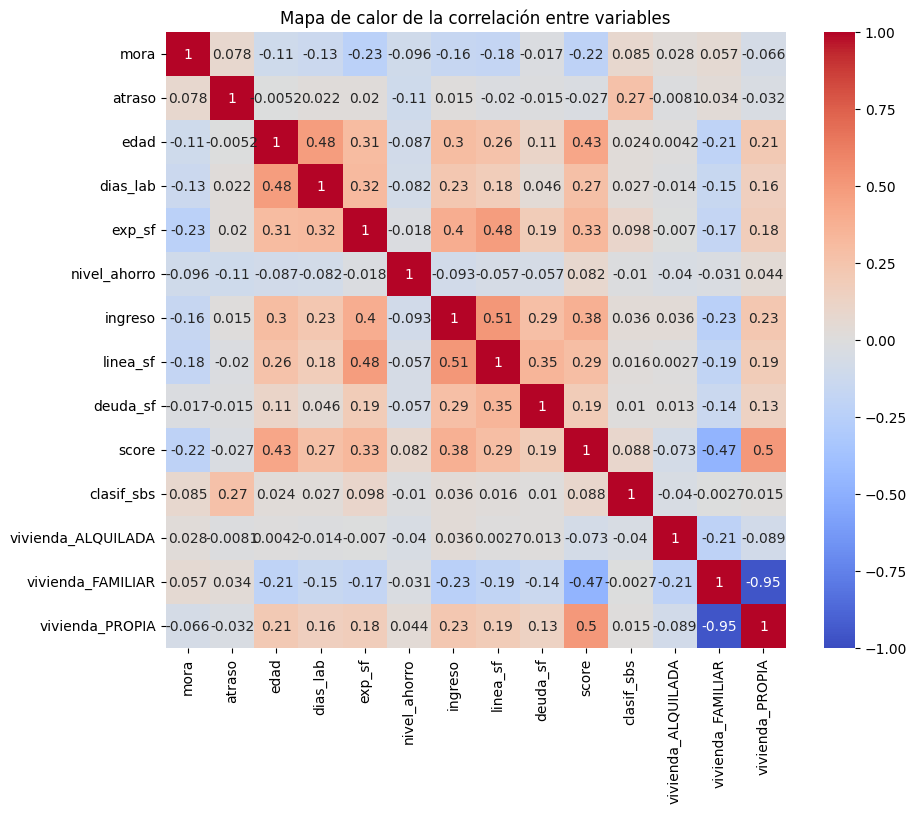

In [189]:
# Crear un subset de solo las variables numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64','boolean'])

# Calcular la matriz de correlación
corr_matrix = numerical_df.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación entre variables')
plt.show()


In [190]:
from sklearn.model_selection import train_test_split

# Seleccionar características (features) y la variable objetivo (target)
X = df.drop(columns=['mora','zona'])
y = df['mora']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modelo Regresión logística

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_RL = accuracy_score(y_test, y_pred)
matrix_RL = confusion_matrix(y_test, y_pred)
reporte_RL = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_RL:.2f}')
print('Matriz de confusión:')
print(matrix_RL)
print('Reporte de clasificación:')
print(reporte_RL)


Precisión del modelo: 0.71
Matriz de confusión:
[[  95  430]
 [  51 1104]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.18      0.28       525
           1       0.72      0.96      0.82      1155

    accuracy                           0.71      1680
   macro avg       0.69      0.57      0.55      1680
weighted avg       0.70      0.71      0.65      1680



c:\Users\lea\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelo Árboles de decisión

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Crear el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_AD = accuracy_score(y_test, y_pred)
matrix_AD = confusion_matrix(y_test, y_pred)
reporte_AD = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_AD:.2f}')
print('Matriz de confusión:')
print(matrix_AD)
print('Reporte de clasificación:')
print(reporte_AD)

Precisión del modelo: 0.81
Matriz de confusión:
[[368 157]
 [160 995]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       525
           1       0.86      0.86      0.86      1155

    accuracy                           0.81      1680
   macro avg       0.78      0.78      0.78      1680
weighted avg       0.81      0.81      0.81      1680



### Modelo SVM

In [193]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear el modelo de Support Vector Machine
model = SVC()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy_SVM = accuracy_score(y_test, y_pred)
matrix_SVM = confusion_matrix(y_test, y_pred)
reporte_SVM = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_SVM:.2f}')
print('Matriz de confusión:')
print(matrix_SVM)
print('Reporte de clasificación:')
print(reporte_SVM)


Precisión del modelo: 0.70
Matriz de confusión:
[[  52  473]
 [  29 1126]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.64      0.10      0.17       525
           1       0.70      0.97      0.82      1155

    accuracy                           0.70      1680
   macro avg       0.67      0.54      0.49      1680
weighted avg       0.68      0.70      0.62      1680



# FASE 5: Evaluación del modelo

In [9]:
import joblib
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load('modelo_arbol_decision.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'modelo_arbol_decision.pkl'

In [195]:
# using traditional dtaset, i need to create a new dataset for validate the model
#Carga Dataset
new_values = pd.read_csv('prueba - prueba.csv', sep=",")

predicciones_nuevas = modelo_cargado.predict(new_values)

print(f'Predicciones para los nuevos datos: {predicciones_nuevas}')


Predicciones para los nuevos datos: [0 0 0 ... 1 1 1]
